In [1]:
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt

In [2]:
gastos = pd.read_csv('files/Bolsonaro2009-2017.csv', sep = ";")
gastos.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,JAIR BOLSONARO,45317828791,74847,302,2007,RJ,PP**,53,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2009,0,NaN,NaN,412748,NaN,NaN,731,1637402,NaN
1,JAIR BOLSONARO,45317828791,74847,302,2007,RJ,PP**,53,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2009,0,NaN,NaN,400948,NaN,NaN,731,1599874,NaN
2,JAIR BOLSONARO,45317828791,74847,302,2007,RJ,PP**,53,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2009,0,NaN,NaN,408000,NaN,NaN,731,1621344,NaN
3,JAIR BOLSONARO,45317828791,74847,302,2007,RJ,PP**,53,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2009,0,NaN,NaN,394939,NaN,NaN,731,1582537,NaN
4,JAIR BOLSONARO,45317828791,74847,302,2007,RJ,PP**,53,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2009,0,NaN,NaN,394938,NaN,NaN,731,1582534,NaN


In [3]:
gastos.isnull().sum()

txNomeParlamentar               0
cpf                             0
ideCadastro                     0
nuCarteiraParlamentar           0
nuLegislatura                   0
sgUF                            0
sgPartido                       0
codLegislatura                  0
numSubCota                      0
txtDescricao                    0
numEspecificacaoSubCota         0
txtDescricaoEspecificacao    3994
txtFornecedor                   0
txtCNPJCPF                      0
txtNumero                       0
indTipoDocumento                0
datEmissao                    290
vlrDocumento                    0
vlrGlosa                        0
vlrLiquido                      0
numMes                          0
numAno                          0
numParcela                      0
txtPassageiro                3087
txtTrecho                    3081
numLote                         0
numRessarcimento             1820
vlrRestituicao               4298
nuDeputadoId                    0
ideDocumento  

In [4]:
gastos.fillna(0,inplace=True)

In [5]:
por_ano = gastos.groupby('numAno').sum()['vlrDocumento']
por_ano

numAno
2009    244894.07
2010    315776.93
2011    319257.84
2012    303541.97
2013    351117.37
2014    300161.64
2015    344481.97
2016    369085.29
2017    223208.50
Name: vlrDocumento, dtype: float64

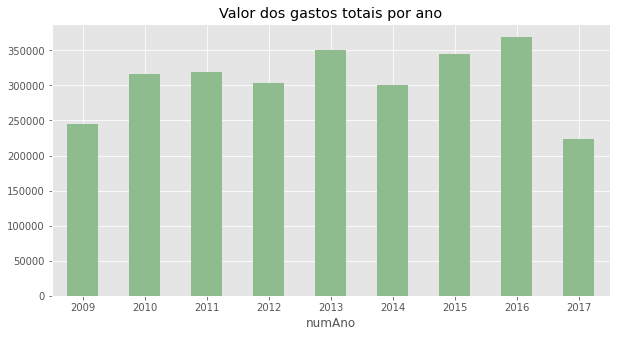

In [7]:
plt.style.use("ggplot")
por_ano.plot(kind='bar', subplots=True, label="Valor dos gastos totais por ano" ,figsize=(10, 5), color='darkseagreen')
plt.xticks(rotation=360)
plt.savefig('content/gastos_por_ano.png')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

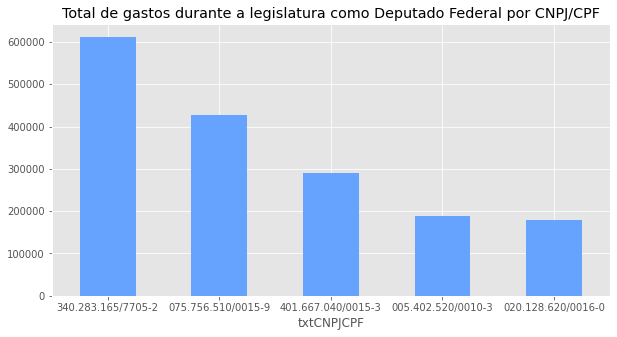

In [6]:
por_fornecedor = gastos.groupby('txtCNPJCPF').sum()['vlrDocumento'].sort_values(ascending=False)
por_fornecedor.head(10)


plt.style.use("ggplot")
por_fornecedor.head(5).plot(kind='bar', subplots=True, label="Total de gastos durante a legislatura como Deputado Federal por CNPJ/CPF" ,figsize=(10, 5), color='#66a3ff')
plt.xticks(rotation=360)

#plt.savefig('content/gastos_total_cnpj.pdf')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

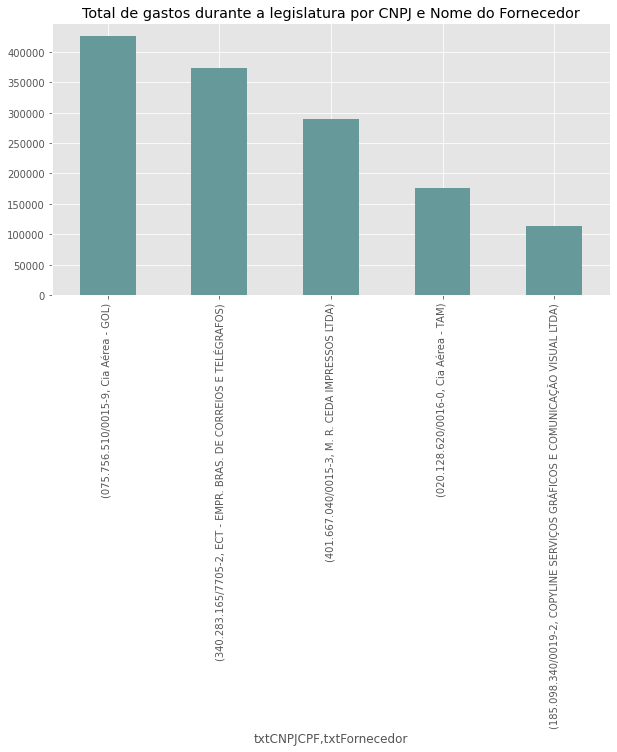

In [8]:
por_fornecedor_nome = gastos.groupby(['txtCNPJCPF','txtFornecedor']).sum()['vlrDocumento'].sort_values(ascending=False)
por_fornecedor_nome

plt.style.use("ggplot")
por_fornecedor_nome.head(5).plot(kind='bar', subplots=True, label="Total de gastos durante a legislatura por CNPJ e Nome do Fornecedor" ,figsize=(10, 5), color='#669999')
plt.xticks(rotation=90)

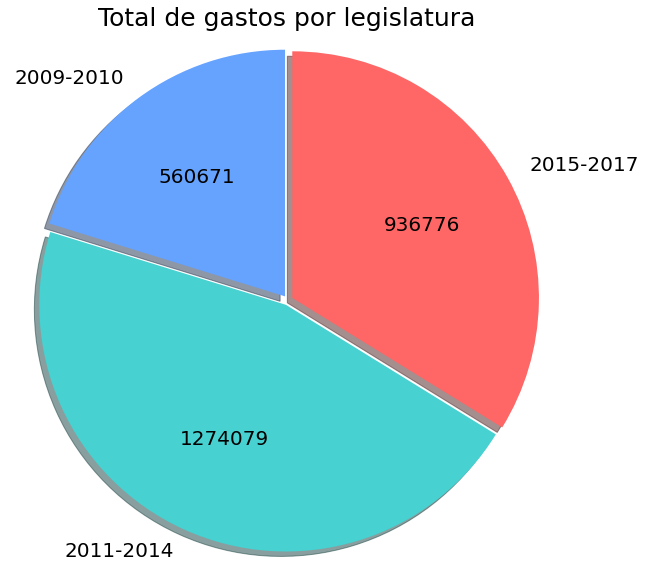

In [6]:
por_ano
labels = ['2009-2010', '2011-2014','2015-2017']
values = []
values.append(por_ano.values[0]+por_ano.values[1])
values.append(por_ano.values[2]+por_ano.values[3]+por_ano.values[4]+por_ano.values[5])
values.append(por_ano.values[6]+por_ano.values[7]+por_ano.values[8])

#para que o gráfico apresente os valores sem porcentagem
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

explode = (0.02,0.02,0.02)
c = ['#66a3ff', '#47d1d1', '#ff6666']
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(values, labels=labels, explode=explode, shadow=True, autopct = autopct_format(values), 
        startangle=90, colors=c, textprops={'fontsize': 20})
ax1.axis('equal')
plt.title('Total de gastos por legislatura', fontsize=25)
plt.show()
#plt.savefig('content/gastos_por_legislatura.png')